<table border="0" style="width:100%">
 <tr>
    <td>
        <img src="https://static-frm.ie.edu/university/wp-content/uploads/sites/6/2022/06/IE-University-logo.png" width=150>
     </td>
    <td><div style="font-family:'Courier New'">
            <div style="font-size:25px">
                <div style="text-align: right"> 
                    <b> MASTER IN BIG DATA</b>
                    <br>
                    Python for Data Analysis II
                    <br><br>
                    <em> Daniel Sierra Ramos </em>
                </div>
            </div>
        </div>
    </td>
 </tr>
</table>

# **S12: DIMENSIONALITY REDUCTION**

## *The curse of dimensionality*

When we talk about the dimension of the data, we refer mainly to the number of columns (features). That is, every feature is a new dimension that introduces more complexity in the total feature space.

- We say data is **high-dimensional** when *the number of features of too big compared to the number of samples* (there's not a concrete measure, because it depends on the case)
   - The extreme case is when the number of features is much greater than the number of samples (M >> N)
- The **curse of dimensionality** makes reference to all the undesired phenomena that occur when we work with data in high-dimensional spaces, that doesn't occur in the low-dimensionality setting. There are a lot of manifestations of this phenomena:
   - **Data Sparsity:** For the same number of data points, **as dimension increases, the the volume of the resulting space increases very fast making data very sparse**. This makes more difficult to find meaningful patterns in data due to the increasing combinatorics of the feature space. In order to obtain reliable results, the **number of samples must grow accordingly (that means exponentially)**, and the is not always possible (the amount of data is limited).
   - **Distance Concentration:** This phenomenon occurs specialy with distance-based algorithms. The euclidean distance between two points in the space **tends to converge to the same value** when the number of dimensions increase. That is, the **concept of proximity is no longer relevant** when we try to find patterns on data based on distance.
   - **Data Understanding:** The higher the dimension, the more complex the data and the more difficult to visualize it. In general, the simpler, the better (Occam's razor).
   - **Overfitting:** Models trained in high dimensional data are easier to overfit. This is because data sparsity. The higher the dimension, the easier is to find a model that perfectly separates between the classes, but doesn't generalize well with unseen data.
- For this reason, models trained on high-dimensional data tend to **overfit**, lowering its performance.

### The Hughes phenomenon

This phenomnon states that, for the same number of samples, the performance of a model will increase as the number of relevant features increase until a certain point at which the performance will decrease (mainly due to overfitting).

<center><img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/classifier%2520performance%2520dimensionality.png" width="500"/></center>

## We need to reduce the dimension of data

In the **dimensionality reduction** area we can find two types of techniques
 - **Feature Extraction** - Consist on reduce the number of columns of the feature matrix by generating new features as combinations of the original ones.
    - Pros: This techniques help to compress more the information by combining several features from the original set.
    - Cons: The original interpretation of the feature set is lost
 - **Feature Selection** - Consist on selecting the most relevant features from the original set given some metric
    - Pros: The original interpretation of the feature set in not lost (because we're just selecting features)
    - Cons: Depending on the algorithm, these techniques can be computationally time consuming

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split

In [2]:
data = fetch_covtype()

MemoryError: 

In [ ]:
print(data["DESCR"])

In [ ]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"], name=data["target_names"][0])
data = pd.concat([X, y], axis=1)

In [ ]:
X.info()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

## **Feature Extraction methods**
 - **Principal Component Analysis (PCA)** - It's the simplest method of feature compression. Consist on building a new feature where each new feature can be expressed as a linear combination between the features in the original set. This is an unsupervised method (it doesn't require a target)
 - **Linear Discriminant Analysis (LDA)** - This method (also used in classification) is similar to PCA but in cases where we have classes. It tries to compress the feature space taking into account how classes in the classification problem are distributed.
 - **Kernel Principal Component Analysis (kPCA)** - This is the non-linear version of PCA. That is, the new features can be expressed as non-linear combinations of features in the original set.

#### PCA vs LDA
<center><img src=https://atrystwithprogramming.files.wordpress.com/2015/11/pcavslda1.png><center/>

## **Feature Selection methods**
Feature selection methods are usually supervised, so we'll need a target to apply them. Feature Selection methods can be classified in three categories:
 - **Filters** - These methods consist on directly filter those features without relevance agains the target using some kind of metric.  
 - **Wrappers** - These methods consist on train some ML model on data on several combinations of the feature set and select the set of features with best results
 - **Intrinsic methods** - These consist on apply some king of model that natively have the capacity of calculate the feature importance of each feature in the feature set.

### **Filter methods**
 - **Variance threshold** - `sklearn.feature_selection.VarianceThreshold` - Consist on directly removing those features without enough variance. If a feature have variance 0, it means that it not contains information.
 - **SelectKBest** - `sklearn.feature_selection.SelectKBest` - This is the simplest method. Consist on calculating a relevance metric for each feature against the target. Some relevance metrics
    - ANOVA - Analysis of Variance of the feature and class. Well suited to compare Countinuous-Discrete
    - $\chi^2$ - Calculates the $\chi^2$ (chi-squared) statistic. well suited to compare Discrete-Discrete
    - Mutual Information - Calculates the mutual information between two variables. Well suited to compare Continuous-Continuous.
 - **Minimum Redundancy - Maximal Relevance (mrMR)** - *Not implemented in sklearn* - This method consists on including the set of most relevant features while minimizing the redundancy between them.
   1. Select 1 relevance metric (ex: f-score) and 1 redundancy metric (ex: correlation)
   1. Select the most relevant feature comparing all of them with the target. Add that feature to the basket.
   1. Now, iteratively select those features with more relevance against the target and with less redundancy against the current set of selected features in the basket

<center><img src=https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png></center>

#### The **`VarianceThreshold`**

In [20]:
from sklearn.feature_selection import VarianceThreshold

In [21]:
vt = VarianceThreshold(threshold=0.2)
X_train_sel = vt.fit_transform(X_train)

In [26]:
X_train_sel.shape

(174303, 12)

In [27]:
X_train.shape

(174303, 54)

In [23]:
vt.variances_

array([7.84178699e+04, 1.25117674e+04, 5.62179831e+01, 4.49449220e+04,
       3.37589898e+03, 2.43094515e+06, 7.17681342e+02, 3.90346126e+02,
       1.47129912e+03, 1.74831478e+06, 2.47465257e-01, 4.84275768e-02,
       2.45865645e-01, 5.95667030e-02, 5.27868805e-03, 1.23449387e-02,
       8.18193891e-03, 2.08866584e-02, 2.78047372e-03, 1.09500682e-02,
       1.77819582e-04, 3.03975746e-04, 2.04396257e-03, 5.32053518e-02,
       2.00785863e-02, 4.87519959e-02, 2.90833356e-02, 1.04879359e-03,
       1.14741402e-05, 4.75619504e-03, 5.64750482e-03, 3.19107337e-03,
       6.63909064e-03, 1.56726426e-02, 1.45510899e-03, 5.47345090e-02,
       8.95623018e-02, 3.53269538e-02, 8.48375150e-04, 4.35258582e-03,
       1.85537678e-03, 1.65528321e-03, 1.59780938e-01, 4.89732748e-02,
       4.23237951e-02, 8.25754908e-02, 7.20872061e-02, 2.60928982e-03,
       3.25377383e-03, 1.66349260e-04, 4.64492055e-04, 2.56889152e-02,
       2.31602735e-02, 1.47552716e-02])

#### The **`SelectKBest`**

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif

In [12]:
sel = SelectKBest(score_func=f_classif, k=5)
sel.fit(X_train, y_train)

SelectKBest(k=5)

In [13]:
# The selected features
sel.get_feature_names_out()

array(['Elevation', 'Wilderness_Area_3', 'Soil_Type_3', 'Soil_Type_9',
       'Soil_Type_37'], dtype=object)

In [15]:
# The scores calculated for each feature
scores = pd.Series(sel.scores_, index=X.columns)
scores = scores.sort_values(ascending=False)

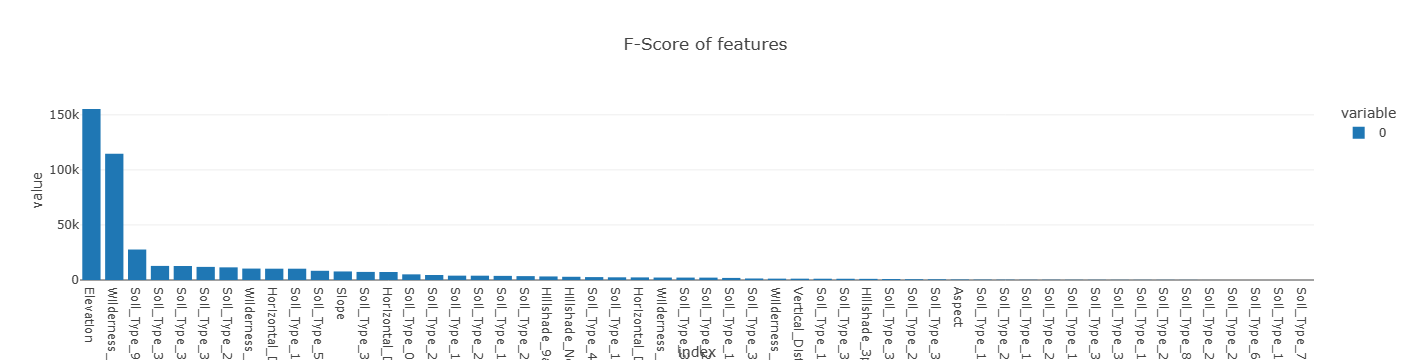

In [19]:
px.bar(scores, template="none", title="F-Score of features")

### **Wrapper methods**
 - **Lasso SVM** - `sklearn.feature_selection.SelectFromModel` - This method consist on applying a linear SVM with L1 regularization. The L1 regularization will shring the coefficients associated to each feature in the SVM towards 0, even making some of them exactly 0. Those coefficients with value 0 can be removed from the feature set.
 
 <center><img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_lars_001.png></center>
 
 - **Forward Selection** - `sklearn.feature_selection.SequentialFeatureSelector` - This technique consist on apply some "fast" machine learning model changing the feature set in a forward setting. The forward setting is as follows:
     1. Train the model with 1 feature
     2. Train the model with 2 features
     ...
     10. Train the model with 10 (all) features
  Then select the best number of features
  
 - **Backward Selection** - `sklearn.feature_selection.SequentialFeatureSelector` - The same as Forward Selection, but starting training the model with all features and continue removing features one by one
 - **Recursive Feature Elimination (RFE)** - `sklearn.feature_selection.RFE` - Train a model of the whole set of features and removes the least important features. Then trains recursively the model again over the set of remaining features until the number of desired features is reached 

#### The **SVM-L1** feature selection

To implement the SVM-L1 feature selection, we will use the `SelectFromModel` class in `scikit-learn`. This class can be used with any other estimator that provides coefficients or features importances.

In [55]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [56]:
# first define a Linear SVM
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False)

In [57]:
# then wrap the SVM object with a SelectFromModel class
model = SelectFromModel(lsvc)
X_new = model.fit_transform(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [60]:
X_new.shape

(174303, 30)

In [61]:
model.get_feature_names_out()

array(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_1',
       'Soil_Type_3', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39'],
      dtype=object)

#### The **Forward Selection (or Search)** algorithm

In [69]:
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression(max_iter=1000, C=0.1)

In [75]:
sfs = SequentialFeatureSelector(
    lr,
    n_features_to_select=3,
    direction="forward",
    scoring="f1_weighted"
)

Note: The `n_features_to_select` can be set to "auto" to be used jointly with "tol" as a stop criteria.

In [77]:
X_train_red = sfs.fit_transform(X_train, y_train)

/tmp/ipykernel_247/684276371.py:1: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 

KeyboardInterrupt: 

### **Intrinsic methods**
 - **Decision Tree and Random Forest** - Tree-based are constitutes good ways to solve supervised problems but also to extract information about the most relevant features in a dataset. Tree models are training by spliting the feature space according the best as possible by selecting first the most related features with the class in order to maximize the separability.

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier(
    n_estimators=10
)
rf.fit(X,y)

RandomForestClassifier(n_estimators=10)

In [84]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

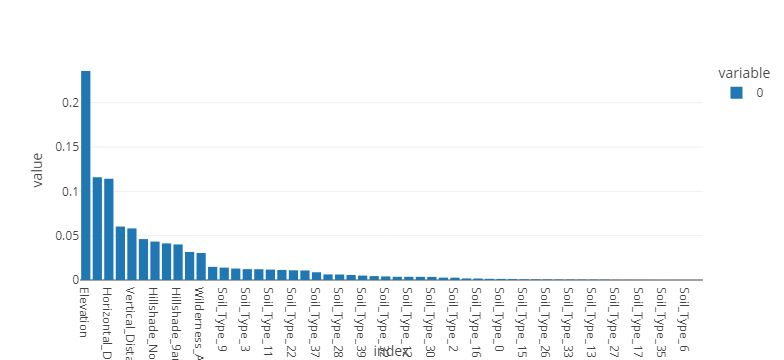

In [89]:
px.bar(feature_importance, template="none")